Physics Informed Neural Networks - June 2024

* Dr. Mohammad Samara
* Udemy

Commented by Anthropic's AI, Claude



2D Burgers Equation - Mathematically modeling a heated aluminum rod

* Solving the equation notebook
* Uses numerical equations developed using finite differences

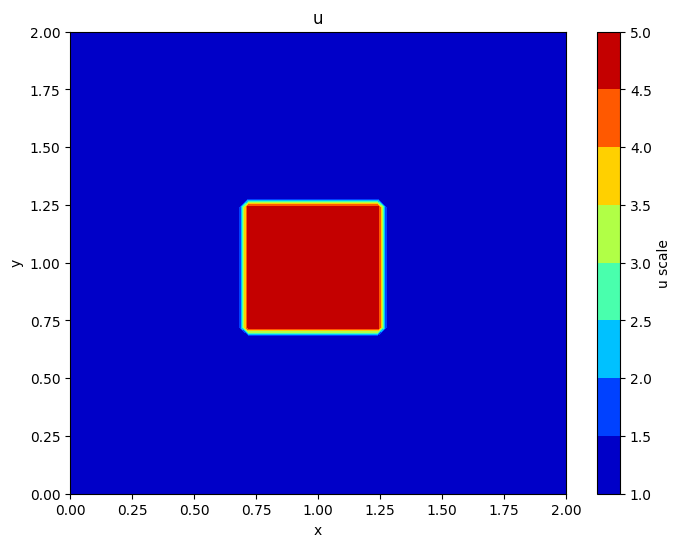

In [1]:
"""
Abstract:
This Python script numerically solves the 2D Burgers equation using finite differences to model the temperature distribution
of a heated aluminum rod. The script sets up the domain, initializes the temperature distribution, and visualizes
the initial temperature contour plot.

The Burgers equation is a nonlinear partial differential equation that describes the evolution of a field, such as temperature
or velocity, over time. In this script, we solve the equation numerically using the finite difference method to model
the temperature distribution along a heated aluminum rod in two dimensions (x and y).

"""

# Code Block 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Code Block 2: Set up domain and parameters
nx = 51  # Number of grid points along the rod in the x direction
ny = 51  # Number of grid points along the rod in the y direction
nu = 0.1  # Diffusion coefficient or kinematic viscosity

nt = 500  # Number of time steps
dt = 0.001  # Time step size

dx = 2 / (nx - 1)  # Grid spacing in the x direction (domain is from 0 to 2)
dy = 2 / (ny - 1)  # Grid spacing in the y direction (domain is from 0 to 2)
x = np.linspace(0, 2, nx)  # Array of grid points in the x direction
y = np.linspace(0, 2, ny)  # Array of grid points in the y direction

# Code Block 3: Initialize arrays for temperature distribution
comb = np.zeros((ny, nx))  # Combined array for visualization (currently unused)

u = np.ones((ny, nx))  # Current time step for u velocity component
v = np.ones((ny, nx))  # Current time step for v velocity component
un = np.zeros((ny, nx))  # Previous time step for u velocity component (currently unused)
vn = np.zeros((ny, nx))  # Previous time step for v velocity component (currently unused)
uf = np.ones((nt, ny, nx))  # New time step for u velocity component
vf = np.ones((nt, ny, nx))  # New time step for v velocity component

# Code Block 4: Set initial temperature distribution
# Set initial temperature distribution (heated region in the center)
u[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
v[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
uf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
vf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5

# Code Block 5: Visualize initial temperature distribution
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, u[:], cmap='jet')  # Create a contour plot of the temperature distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("u scale")  # Set the label for the colorbar
plt.title('u')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot

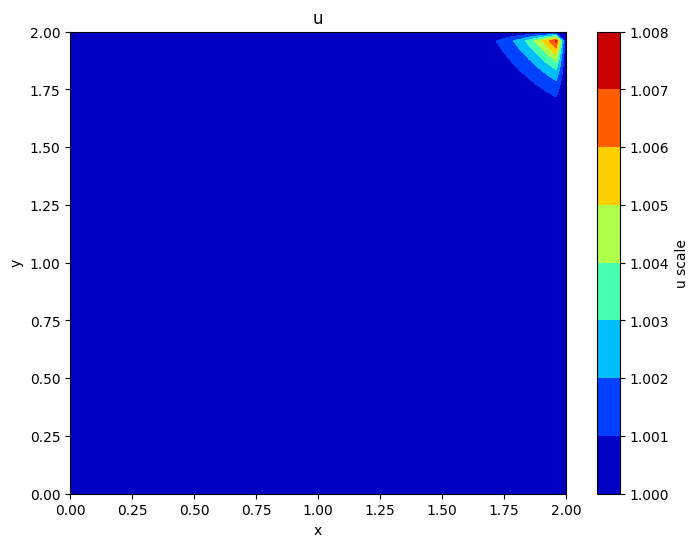

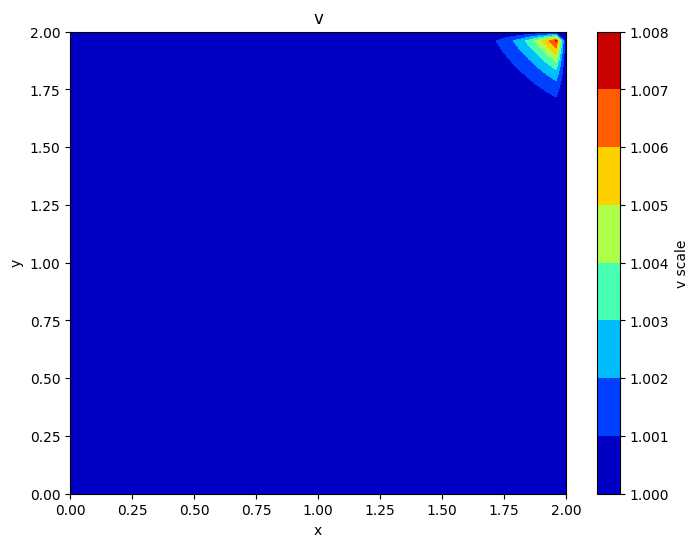

In [8]:
# Code block 6: Explicit finite difference method
for n in range(1, nt): # nt = numerical time, zero is the boundary condition thus we start at 1
    un = u.copy()   # takes data from last time step, for velocity in the x direction
    vn = v.copy()   # takes data from last time step, for velocity in the y direction
    # walks through entire mesh (grid) using the discretized finite difference equations
    for i in range(1, nx - 1):      # walks through x direction
        for j in range(1, ny - 1):  # walks through y direction
          u[i,j] = (un[i,j] - (un[i,j] * dt / dx * (un[i,j] - un[i-1,j])) - vn[i,j] * dt / dy * (un[i,j] - un[i,j-1]))
          v[i,j] = (vn[i,j] - (un[i,j] * dt / dx * (vn[i,j] - vn[i-1,j])) - vn[i,j] * dt / dy * (vn[i,j] - vn[i,j-1]))
          uf[n,i,j] = u[i,j] # saves the solution
          vf[n,i,j] = v[i,j]
    # update the boundary conditions
    u[:,0  ] = 1
    u[:,-1 ] = 1
    u[0,:  ] = 1
    u[-1,: ] = 1

    v[:,0  ] = 1
    v[:,-1 ] = 1
    v[0,:  ] = 1
    v[-1,: ] = 1

# Code Block 7: Visualize updated temperature distribution for u
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, u[:], cmap='jet')  # Create a contour plot of the temperature distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("u scale")  # Set the label for the colorbar
plt.title('u')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot

# Code Block 8: Visualize updated temperature distribution for v
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, v[:], cmap='jet')  # Create a contour plot of the temperature distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("v scale")  # Set the label for the colorbar
plt.title('v')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot